In [37]:
import pandas as pd
import numpy as np

In [38]:
file = "quiz4data.csv"

df = pd.read_csv(file)

s1 = df[df['dataset'] == 'S1'][['x', 'y']].to_numpy()
s2 = df[df['dataset'] == 'S2'][['x', 'y']].to_numpy()
s3 = df[df['dataset'] == 'S3'][['x', 'y']].to_numpy()
s4 = df[df['dataset'] == 'S4'][['x', 'y']].to_numpy()

In [39]:
## means
mean_s1_x = np.mean(s1[0])
mean_s1_y = np.mean(s1[1])
mean_s2_x = np.mean(s2[0])
mean_s2_y = np.mean(s2[1])
mean_s3_x = np.mean(s3[0])
mean_s3_y = np.mean(s3[1])
mean_s4_x = np.mean(s4[0])
mean_s4_y = np.mean(s4[1])

## standard deviations
std_s1_x = np.std(s1[0])
std_s1_y = np.std(s1[1])
std_s2_x = np.std(s2[0])
std_s2_y = np.std(s2[1])
std_s3_x = np.std(s3[0])
std_s3_y = np.std(s3[1])
std_s4_x = np.std(s4[0])
std_s4_y = np.std(s4[1])

## correlation coefficients
corrcoeff_s1 = np.corrcoef(s1)
corrcoeff_s2 = np.corrcoef(s2)
corrcoeff_s3 = np.corrcoef(s3)
corrcoeff_s4 = np.corrcoef(s4)

In [40]:
##Calculate coeffs of each dataset

y_1 = [s1[i][1] for i in range(len(s1))]

s1 = np.delete(s1, 1, 1)

s1_b = np.vstack([np.ones(len(s1.T[0])), s1.T])

coeff_s1 = np.linalg.inv(s1_b@s1_b.T)@s1_b@y_1
coeff_s1 = coeff_s1.round(2)

print(f'Coeff: {coeff_s1}')

y_2 = [s2[i][1] for i in range(len(s2))]

s2 = np.delete(s2, 1, 1)

s2_b = np.vstack([np.ones(len(s2.T[0])), s2.T])

coeff_s2 = np.linalg.inv(s2_b@s2_b.T)@s2_b@y_2
coeff_s2 = coeff_s2.round(2)

print(f'Coeff: {coeff_s2}')

y_3 = [s3[i][1] for i in range(len(s3))]

s3 = np.delete(s3, 1, 1)

s3_b = np.vstack([np.ones(len(s3.T[0])), s3.T])

coeff_s3 = np.linalg.inv(s3_b@s3_b.T)@s3_b@y_3
coeff_s3 = coeff_s3.round(2)

print(f'Coeff: {coeff_s3}')

y_4 = [s4[i][1] for i in range(len(s4))]

s4 = np.delete(s4, 1, 1)

s4_b = np.vstack([np.ones(len(s4.T[0])), s4.T])

coeff_s4 = np.linalg.inv(s4_b@s4_b.T)@s4_b@y_4
coeff_s4 = coeff_s4.round(2)

print(f'Coeff: {coeff_s4}')

Coeff: [3.  0.5]
Coeff: [3.  0.5]
Coeff: [3.  0.5]
Coeff: [3.  0.5]


In [41]:
##Coeffs of each dataset

w0_s1 = coeff_s1[0]
w1_s1 = coeff_s1[1]

w0_s2 = coeff_s2[0]
w1_s2 = coeff_s2[1]

w0_s3 = coeff_s3[0]
w1_s3 = coeff_s3[1]

w0_s4 = coeff_s4[0]
w1_s4 = coeff_s4[1]

In [42]:
## y_hats of each dataset
yhat_1 = w0_s1 + w1_s1 * s1
yhat_2 = w0_s2 + w1_s2 * s2
yhat_3 = w0_s3 + w1_s3 * s3
yhat_4 = w0_s4 + w1_s4 * s4

print(yhat_1.T, yhat_2.T, yhat_3.T, yhat_4.T)

[[ 8.   7.   9.5  7.5  8.5 10.   6.   5.   9.   6.5  5.5]] [[ 8.   7.   9.5  7.5  8.5 10.   6.   5.   9.   6.5  5.5]] [[ 8.   7.   9.5  7.5  8.5 10.   6.   5.   9.   6.5  5.5]] [[ 7.   7.   7.   7.   7.   7.   7.  12.5  7.   7.   7. ]]


In [43]:
## means of y values of each dataset

y_mean_1 = round(sum(y_1)/len(y_1), 2)
y_mean_2 = round(sum(y_2)/len(y_2), 2)
y_mean_3 = round(sum(y_3)/len(y_3), 2)
y_mean_4 = round(sum(y_4)/len(y_4), 2)

print(y_mean_1, y_mean_2, y_mean_3, y_mean_4)

7.5 7.5 7.5 7.5


In [44]:
## sum of all y_i - y_mean squared

denominator_1 = round(sum([(y_i - y_mean_1)**2 for y_i in y_1]), 1)
denominator_2 = round(sum([(y_i - y_mean_2)**2 for y_i in y_2]), 1)
denominator_3 = round(sum([(y_i - y_mean_3)**2 for y_i in y_3]), 1)
denominator_4 = round(sum([(y_i - y_mean_4)**2 for y_i in y_4]), 1)

print(denominator_1, denominator_2, denominator_3, denominator_4)

41.3 41.3 41.2 41.2


In [45]:
## sum of all y_i - y_hat_i squared

numerator_1 = round(sum(sum((y_1 - yhat_1.T)**2), 1))
numerator_2 = round(sum(sum((y_2 - yhat_2.T)**2), 1))
numerator_3 = round(sum(sum((y_3 - yhat_3.T)**2), 1))
numerator_4 = round(sum(sum((y_4 - yhat_4.T)**2), 1))

print(numerator_1, numerator_2, numerator_3, numerator_4)

15 15 15 15


In [46]:
## 1 - (sum of all y_i - y_hat_i squared / sum of all y_i - y_mean squared)

coeff_det_1 = 1 - (numerator_1/denominator_1)
coeff_det_2 = 1 - (numerator_2/denominator_2)
coeff_det_3 = 1 - (numerator_3/denominator_3)
coeff_det_4 = 1 - (numerator_4/denominator_4)

print(coeff_det_1, coeff_det_2, coeff_det_3, coeff_det_4)

0.6368038740920097 0.6368038740920097 0.6359223300970874 0.6359223300970874


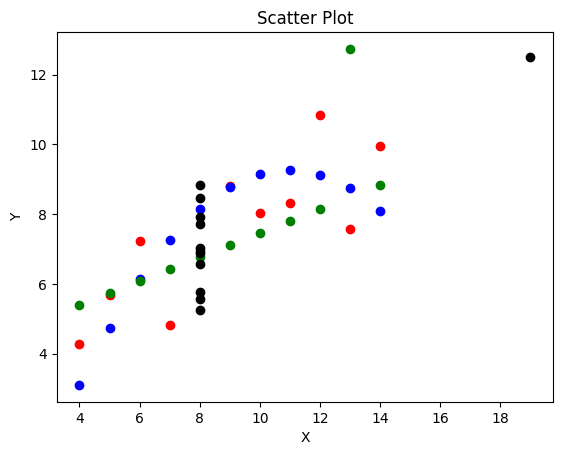

In [47]:
import matplotlib.pyplot as plt

## Plot all datasets

plt.title("Scatter Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(s1.T, y_1, color ="red", )
plt.scatter(s2.T, y_2, color ="blue", )
plt.scatter(s3.T, y_3, color ="green", )
plt.scatter(s4.T, y_4, color ="black", )

plt.show()

## Question 7

Always inspect and explore your data before working with it. For example, in this dataset, we can see that the x values of S1, S2, and S3 are the same, which would result in similar coefficients and yhats. S4 has the same x values exexpt for one (19) which could trick the model into spitting out the same coeffs as S1, S2, and S3. Even the means were the same. Although the xs from each dataset S1, S2, and S3 share the same values, the model of best fit we choose depends on the relation between y and x.